### Import Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.io import gbq
from statistics import mean
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

pd.options.mode.chained_assignment = None  # default='warn'

### Benchmark - Linear Regression

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3130.07rows/s]


AVG R2-Score:  0.1749
EXAMPLE R2-Score:  0.188


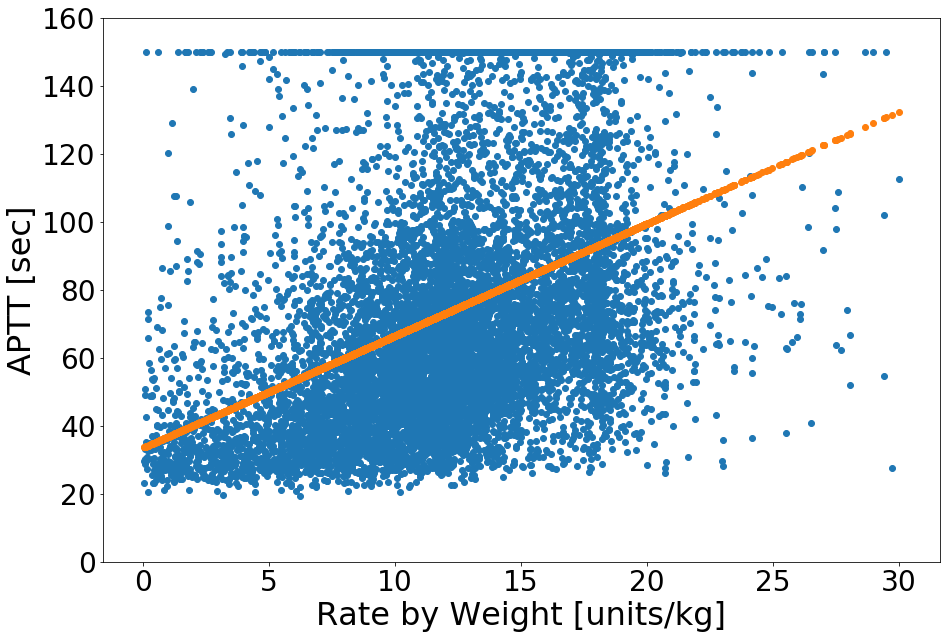

In [25]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})                 
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Rate by Weight [units/kg]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.scatter(x_train, lin_reg.predict(x_train))

# Evaluate the Example:
print("EXAMPLE R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test)), 4))

### Polynomial Regression: Degree 2

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:06<00:00, 2522.23rows/s]


AVG R2-Score:  0.1748
R2-Score:  0.188


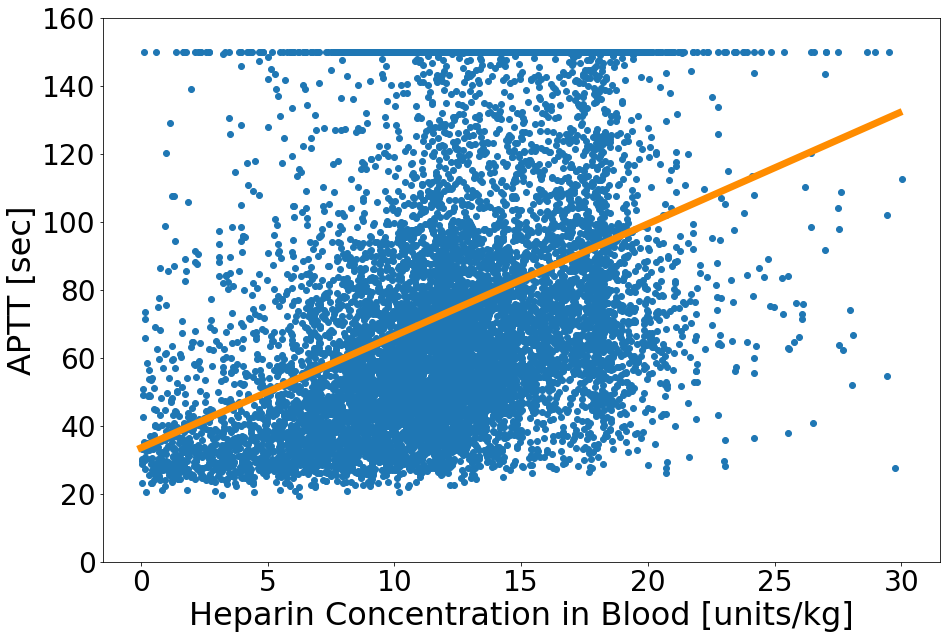

In [26]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

## Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    poly = PolynomialFeatures(degree=2)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test_poly)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Transform to Polynomial Features:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)
coefficient = lin_reg.coef_
intercept = lin_reg.intercept_

# Plot the Results:
x_axis = np.arange(0,30,0.1)
response = intercept + coefficient[0][1] * x_axis + coefficient[0][2] * x_axis**2

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Heparin Concentration in Blood [units/kg]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.plot(x_axis, response, c='darkorange', linewidth=7)

# Evaluate the model:
print("R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test_poly)), 4))

### Polynomial Regression: Degree 3 

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 3068.42rows/s]


AVG R2-Score:  0.1834
R2-Score:  0.1986


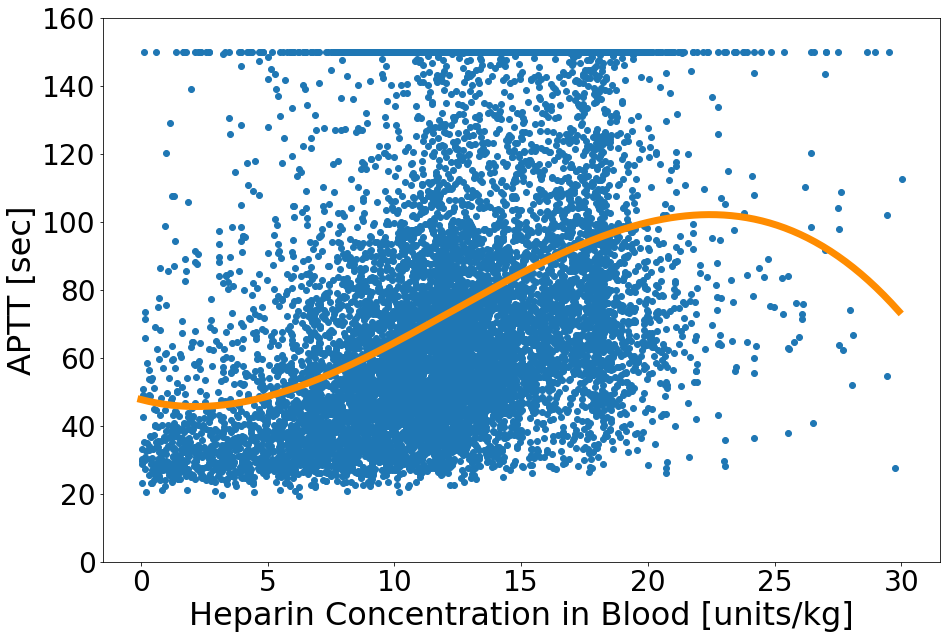

In [30]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

## Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    poly = PolynomialFeatures(degree=3)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test_poly)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Transform to Polynomial Features:
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)
coefficient = lin_reg.coef_
intercept = lin_reg.intercept_

# Plot the Results:
x_axis = np.arange(0,30,0.1)
response = intercept + coefficient[0][1] * x_axis + coefficient[0][2] * x_axis**2 + coefficient[0][3] * x_axis**3

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Heparin Concentration in Blood [units/kg]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.plot(x_axis, response, c='darkorange', linewidth=7)

# Evaluate the model:
print("R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test_poly)), 4))

### Polynomial Regression: Degree 4

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2941.25rows/s]


AVG R2-Score:  0.1835
R2-Score:  0.1988


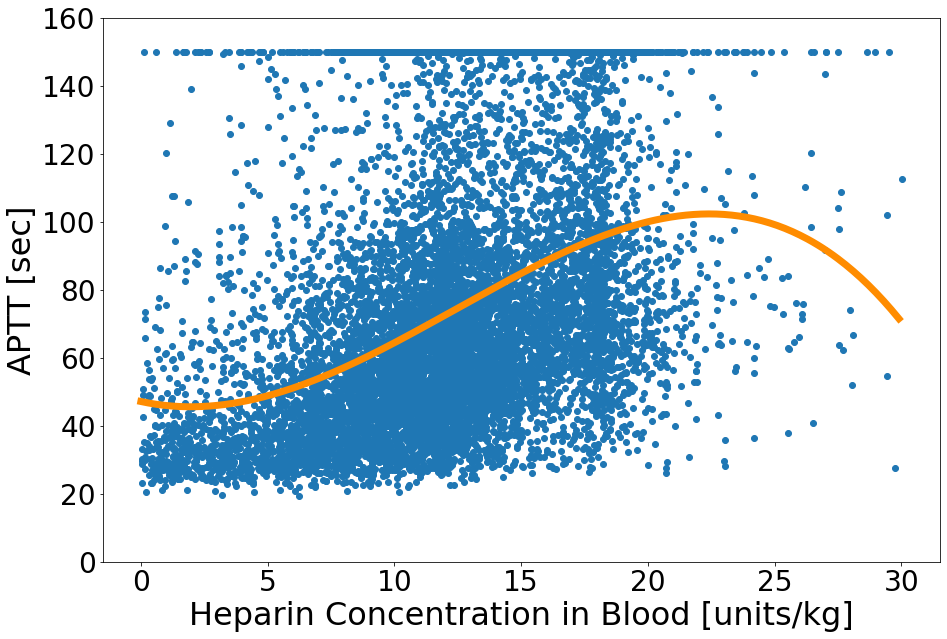

In [29]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

## Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    poly = PolynomialFeatures(degree=4)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test_poly)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Transform to Polynomial Features:
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)
coefficient = lin_reg.coef_
intercept = lin_reg.intercept_

# Plot the Results:
x_axis = np.arange(0,30,0.1)
response = intercept + coefficient[0][1] * x_axis + coefficient[0][2] * x_axis**2 + coefficient[0][3] * x_axis**3 + coefficient[0][4] * x_axis**4

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Heparin Concentration in Blood [units/kg]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.plot(x_axis, response, c='darkorange', linewidth=7)

# Evaluate the model:
print("R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test_poly)), 4))

### Polynomial Regression: Degree 5

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:06<00:00, 2461.40rows/s]


AVG R2-Score:  0.1845
R2-Score:  0.1972


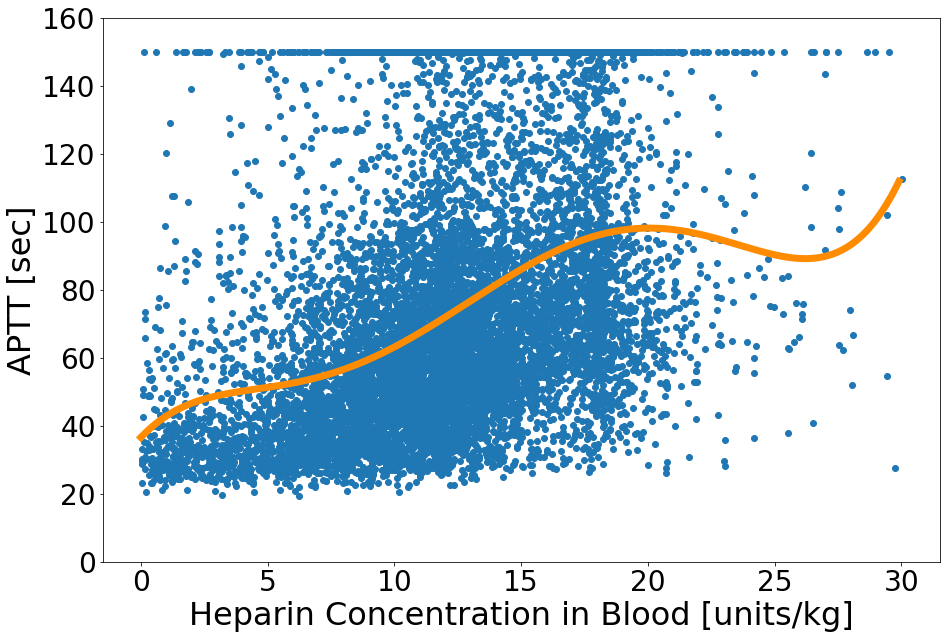

In [31]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

## Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    poly = PolynomialFeatures(degree=5)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test_poly)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Transform to Polynomial Features:
poly = PolynomialFeatures(degree=5)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)
coefficient = lin_reg.coef_
intercept = lin_reg.intercept_

# Plot the Results:
x_axis = np.arange(0,30,0.1)
response = intercept + coefficient[0][1] * x_axis + coefficient[0][2] * x_axis**2 + coefficient[0][3] * x_axis**3 + coefficient[0][4] * x_axis**4 + coefficient[0][5] * x_axis**5

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Heparin Concentration in Blood [units/kg]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.plot(x_axis, response, c='darkorange', linewidth=7)

# Evaluate the model:
print("R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test_poly)), 4))

### Polynomial Regression: Degree 7

In [32]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

## Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    poly = PolynomialFeatures(degree=7)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test_poly)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 3068.59rows/s]


AVG R2-Score:  0.1845


### Polynomial Regression: Degree 10

In [33]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

## Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    poly = PolynomialFeatures(degree=10)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test_poly)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3459.26rows/s]


AVG R2-Score:  0.185


### Multi-Layer Perceptron Regressor

In [22]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

## Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

regr = MLPRegressor(random_state=0, max_iter=500).fit(x_train, y_train.values.ravel())

print("R2-Score: ", np.round(regr.score(x_test, y_test), 4))

Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3341.66rows/s]


R2-Score:  0.1876
